<center> <h1> Object Size Experiments </h1> </center>

In [10]:
#import all packages needed
import json
import pandas as pd
import matplotlib.pyplot as plt

# Centralize the graphs and tables.
from IPython.core.display import HTML, display


display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

<center> <h3> Sequential Write Bandwidth vs. Object Sizes </h3> </center>

,object size,bandwidth[MB/s]
0,0.25MB,39.397
1,0.5MB,38.515
2,1MB,38.970
3,2MB,39.393
4,4MB,26.457
5,8MB,17.699
6,16MB,15.543
7,32MB,15.058
8,64MB,16.009


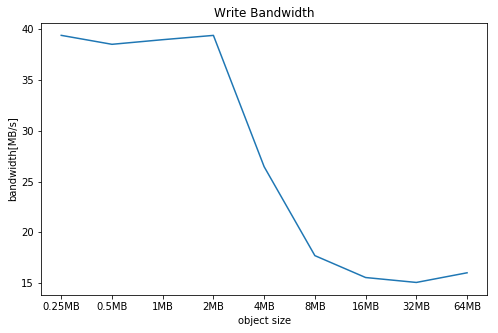

In [13]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

w_bw_list = []
for i in range(len(object_sizes)):
    with open('./data/W'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    w_bw_list.append([object_sizes[i],data['jobs'][0]['write']['bw']/1000])

w_bw_df = pd.DataFrame(w_bw_list, columns=['object size','bandwidth[MB/s]'])
display(w_bw_df)

fig = w_bw_df.plot(x='object size', y='bandwidth[MB/s]', title='Write Bandwidth' ,legend=False, xticks=w_bw_df.index , figsize=[8,5])
fig.set_ylabel("bandwidth[MB/s]")
plt.show()


<center> <h3> Sequential Read Bandwidth vs. Object Sizes </h3> </center>

,object size,bandwidth[MB/s]
0,0.25MB,21.023
1,0.5MB,39.414
2,1MB,63.542
3,2MB,25.218
4,4MB,44.757
5,8MB,51.534
6,16MB,64.195
7,32MB,62.370
8,64MB,67.040


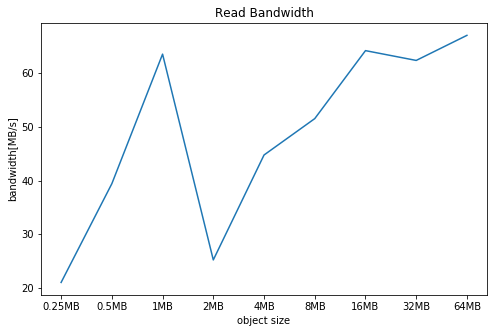

In [14]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

r_bw_list = []
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    r_bw_list.append([object_sizes[i],data['jobs'][0]['read']['bw']/1000])

r_bw_df = pd.DataFrame(r_bw_list, columns=['object size','bandwidth[MB/s]'])
display(r_bw_df)

fig = r_bw_df.plot(x='object size', y='bandwidth[MB/s]', title='Read Bandwidth' ,legend=False, xticks=r_bw_df.index , figsize=[8,5])
fig.set_ylabel("bandwidth[MB/s]")
plt.show()

<center> <h3> Sequential Write Latency vs. Object Sizes </h3> </center>

,object size,latency[msec]
0,0.25MB,6.492742
1,0.5MB,13.288073
2,1MB,26.269834
3,2MB,51.979844
4,4MB,154.806165
5,8MB,462.817124
6,16MB,1054.037660
7,32MB,2175.971627
8,64MB,4093.606147


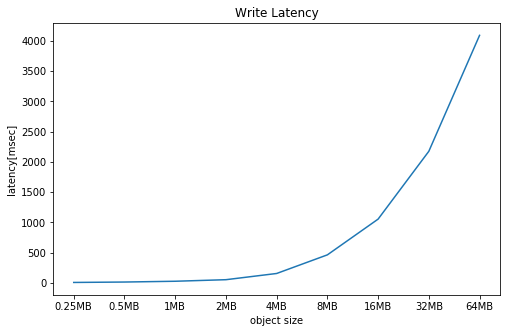

In [15]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

w_lat_list = []
for i in range(len(object_sizes)):
    with open('./data/W'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    w_lat_list.append([object_sizes[i],data['jobs'][0]['write']['lat_ns']['mean']/1000000])

w_lat_df = pd.DataFrame(w_lat_list, columns=['object size','latency[msec]'])
display(w_lat_df)

fig = w_lat_df.plot(x='object size', y='latency[msec]', title='Write Latency' ,legend=False, xticks=w_lat_df.index , figsize=[8,5])
fig.set_ylabel("latency[msec]")
plt.show()

<center> <h3> Sequential Read Latency vs. Object Sizes </h3> </center>

,object size,latency[msec]
0,0.25MB,12.172523
1,0.5MB,12.985600
2,1MB,16.109561
3,2MB,81.201563
4,4MB,91.501972
5,8MB,158.937790
6,16MB,255.163330
7,32MB,525.318665
8,64MB,977.421710


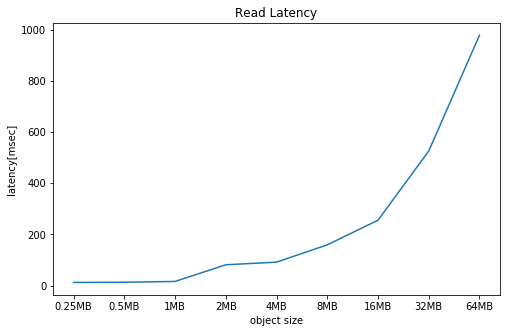

In [16]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

r_lat_list = []
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    r_lat_list.append([object_sizes[i],data['jobs'][0]['read']['lat_ns']['mean']/1000000])

r_lat_df = pd.DataFrame(r_lat_list, columns=['object size','latency[msec]'])
display(r_lat_df)

fig = r_lat_df.plot(x='object size', y='latency[msec]', title='Read Latency' ,legend=False, xticks=r_lat_df.index , figsize=[8,5])
fig.set_ylabel("latency[msec]")
plt.show()

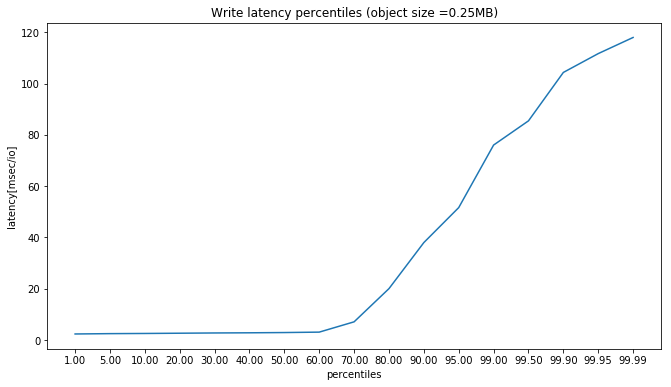

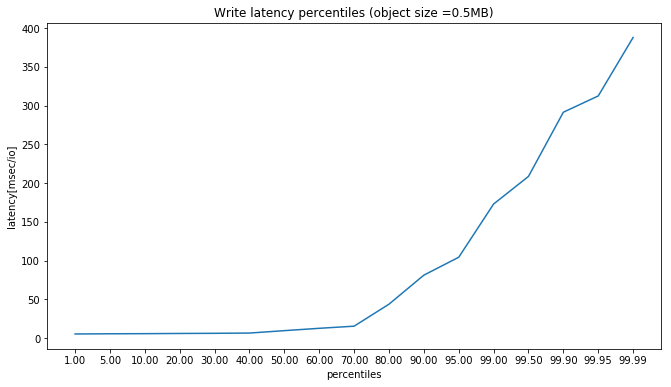

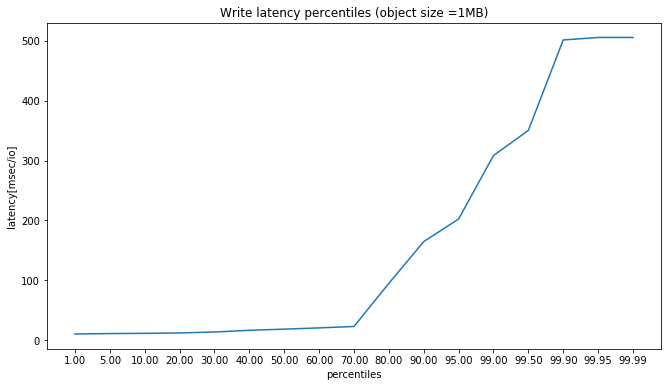

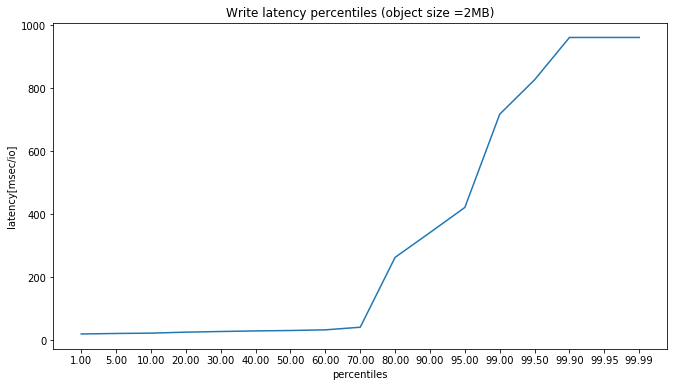

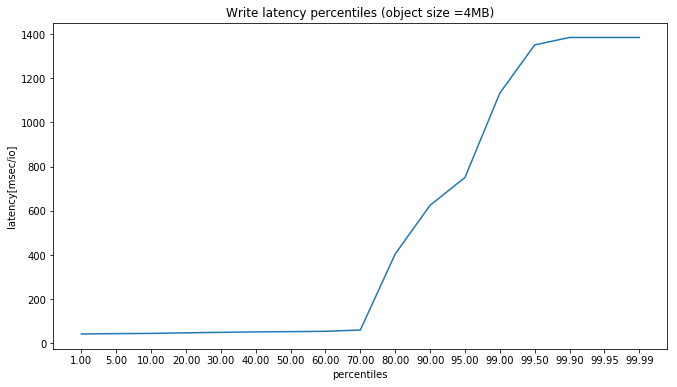

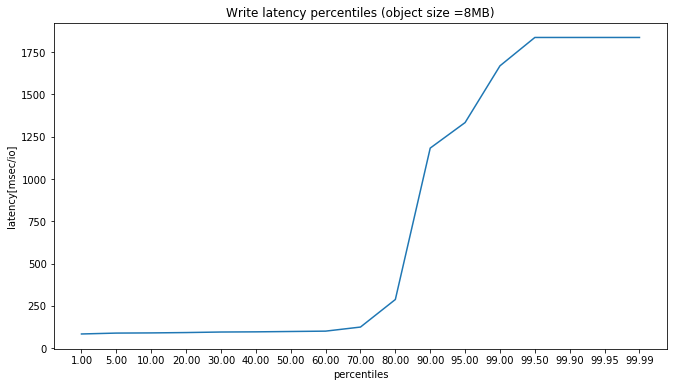

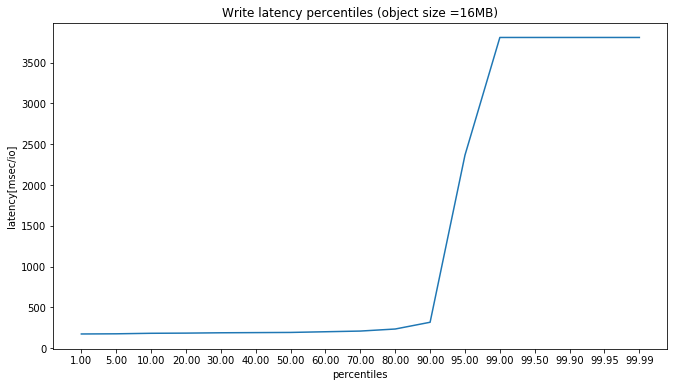

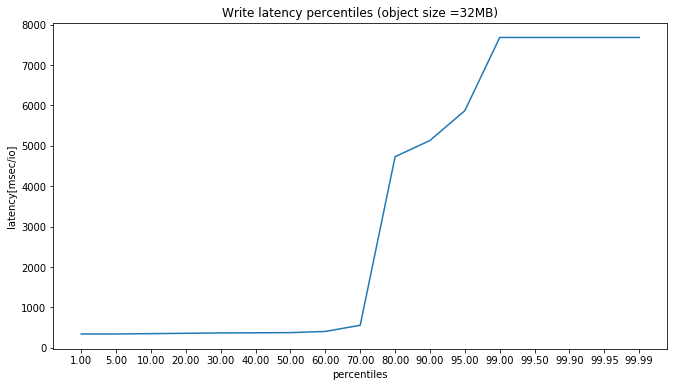

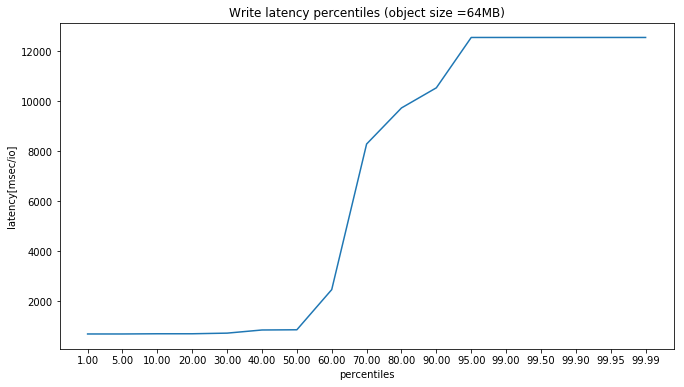

In [49]:
#read json result
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)

    #transform data
    percentiles_df = pd.DataFrame(data['jobs'][0]['read']['clat_ns']['percentile'],index=['latency'])
    percentiles_df = percentiles_df.T
    percentiles_df = percentiles_df.reset_index()
    percentiles_df.rename(columns={'index': 'percentiles'}, inplace=True)

    #format data
    percentiles_df[['percentiles']] = percentiles_df[['percentiles']].astype(float).applymap('{:,.2f}'.format)
    percentiles_df[['latency']] = percentiles_df[['latency']].astype(int).applymap(lambda x: x/1000000)

    #display table
    #display(percentiles_df)

    #display graph
    obj_size = object_sizes[i]
    fig = percentiles_df.plot(x='percentiles', y='latency', title="Write latency percentiles (object size =" + obj_size + ')' ,legend=False, xticks=percentiles_df.index , figsize=[11,6])
    fig.set_ylabel("latency[msec/io]")
    plt.show()


,bandwidth,latency
0,38.265,107.034239
1,39.349,104.083677
2,40.477,101.181893
3,40.031,102.309531
4,41.274,99.214463
5,40.633,100.788593
6,42.011,97.480420
7,39.783,102.930673
8,39.878,102.699699
9,39.118,104.684171


,jobnum,bandwidth
0,1,38.265
1,2,39.349
2,3,40.477
3,4,40.031
4,5,41.274
5,6,40.633
6,7,42.011
7,8,39.783
8,9,39.878
9,10,39.118


,jobnum,latency
0,1,107.034239
1,2,104.083677
2,3,101.181893
3,4,102.309531
4,5,99.214463
5,6,100.788593
6,7,97.480420
7,8,102.930673
8,9,102.699699
9,10,104.684171


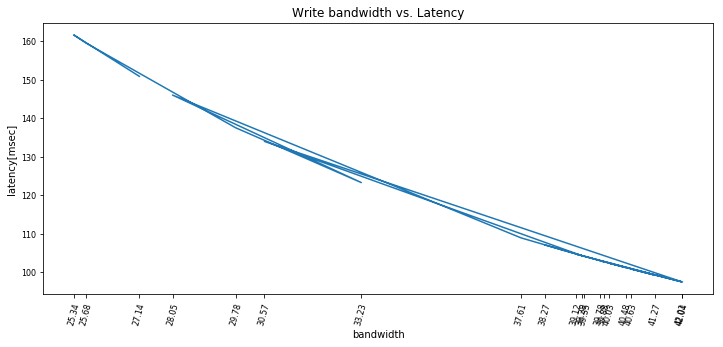

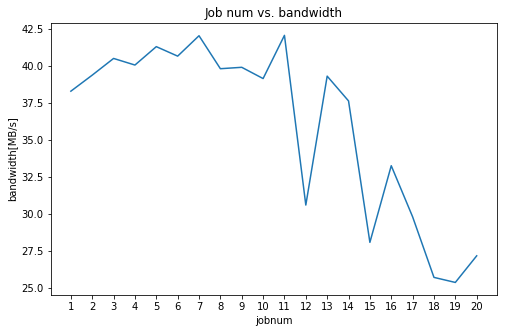

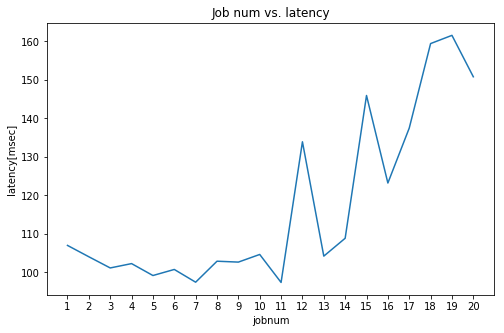

In [9]:
#numjobs = ['1','2','4','8','16','32','64']
numjobs = list(map(lambda x: str(x), range(1,21)))

jobnum_bw = []
jobnum_lat = []
bw_lat = []


for i in range(len(numjobs)):
    with open('./data/W4MB_'+numjobs[i]+'.json') as f:
        data = json.load(f)
    bw_lat.append([data['jobs'][0]['write']['bw']/1000,data['jobs'][0]['write']['lat_ns']['mean']/1000000])
    jobnum_bw.append([numjobs[i], data['jobs'][0]['write']['bw']/1000])
    jobnum_lat.append([numjobs[i], data['jobs'][0]['write']['lat_ns']['mean']/1000000])
    
bw_lat = pd.DataFrame(bw_lat, columns=['bandwidth','latency'])
jobnum_bw = pd.DataFrame(jobnum_bw, columns=['jobnum','bandwidth'])
jobnum_lat = pd.DataFrame(jobnum_lat, columns=['jobnum','latency'])
display(bw_lat)
display(jobnum_bw)
display(jobnum_lat)

fig = bw_lat.plot(kind='line', x='bandwidth', y='latency', title='Write bandwidth vs. Latency' ,legend=False, xticks=bw_lat.bandwidth, fontsize = 8 , rot = 75, figsize=[12,5])
fig.set_ylabel("latency[msec]")


fig_jw = jobnum_bw.plot(kind='line', x='jobnum', y='bandwidth', title='Job num vs. bandwidth' ,legend=False, xticks=jobnum_bw.index,  figsize=[8,5])
fig_jw.set_ylabel("bandwidth[MB/s]")

fig_lt = jobnum_lat.plot(kind='line', x='jobnum', y='latency', title='Job num vs. latency' ,legend=False, xticks=jobnum_lat.index,  figsize=[8,5])
fig_lt.set_ylabel("latency[msec]")

plt.show()